In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.0 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 5.0 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 5.3 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 5.3 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 5.5 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 4.3 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 4.4 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 4.4 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 4.4 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 4.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 2.9 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 3.0 MB/s eta 0:00:01
   ----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")


In [18]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
pip install pandas matplotlib plotly


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.8 MB 11.8 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.8 MB 11.0 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\SURYA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


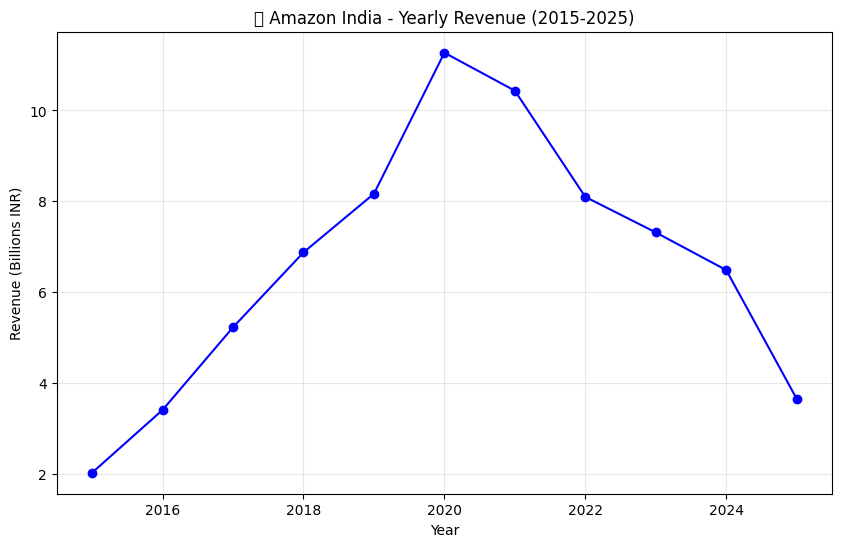

      Year  Revenue_Billions  YoY_Growth_%
0   2015.0              2.03           NaN
1   2016.0              3.41         68.13
2   2017.0              5.23         53.35
3   2018.0              6.88         31.51
4   2019.0              8.17         18.77
5   2020.0             11.27         38.00
6   2021.0             10.44         -7.41
7   2022.0              8.10        -22.40
8   2023.0              7.32         -9.65
9   2024.0              6.49        -11.33
10  2025.0              3.66        -43.64


In [ ]:
# Question 1  Yearly Revenue + YoY Growth:

import pandas as pd
import matplotlib.pyplot as plt

# 1. Load cleaned data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# 2. Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# 3. Extract Year
df['Year'] = df['order_date'].dt.year

# 4. Keep data between 2015–2025
df = df[df['Year'].between(2015, 2025)]

# 5. Calculate yearly revenue
yearly_revenue = df.groupby('Year')['final_amount_inr'].sum().reset_index()

# 6. Convert to Billions for readability
yearly_revenue['Revenue_Billions'] = yearly_revenue['final_amount_inr'] / 1e9

# 7. Calculate YoY Growth %
yearly_revenue['YoY_Growth_%'] = yearly_revenue['Revenue_Billions'].pct_change() * 100

# 8. Plot simple line chart
plt.figure(figsize=(10,6))
plt.plot(yearly_revenue['Year'], yearly_revenue['Revenue_Billions'], marker='o', color='blue')
plt.title("📈 Amazon India - Yearly Revenue (2015-2025)")
plt.xlabel("Year")
plt.ylabel("Revenue (Billions INR)")
plt.grid(True, alpha=0.3)
plt.show()

# 9. Print table
print(yearly_revenue[['Year', 'Revenue_Billions', 'YoY_Growth_%']].round(2))



C:\Users\SURYA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


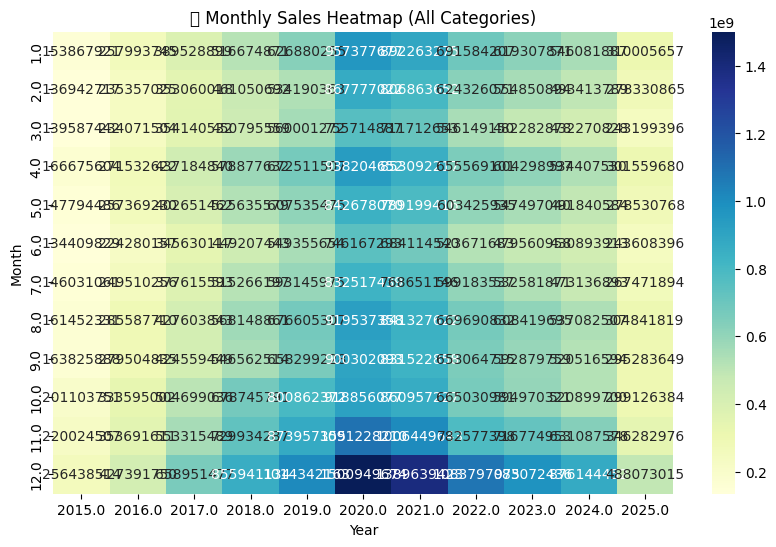

In [ ]:
# Question 2 (seasonal sales patterns with heatmap).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your cleaned file
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# 2. Convert order_date to datetime
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

# 3. Create Year and Month columns
df["Year"] = df["order_date"].dt.year
df["Month"] = df["order_date"].dt.month

# 4. Group sales by Year and Month
monthly_sales = df.groupby(["Year", "Month"])["final_amount_inr"].sum().reset_index()

# 5. Create a pivot table for heatmap
sales_pivot = monthly_sales.pivot(index="Month", columns="Year", values="final_amount_inr")

# 6. Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(sales_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("📊 Monthly Sales Heatmap (All Categories)")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()


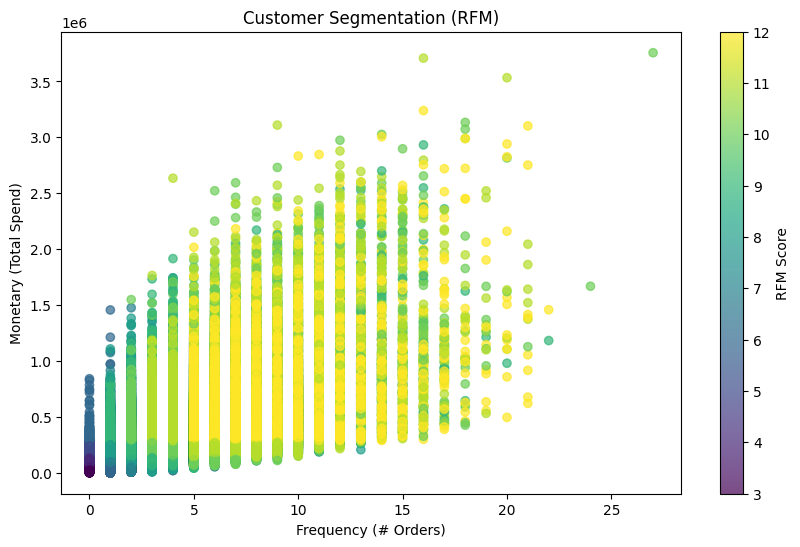

          customer_id  Recency  Frequency   Monetary  R_Score  F_Score  \
0  CUST_2015_00000001   2573.0          5  211034.56        1        4   
1  CUST_2015_00000002   1155.0         10  632049.52        3        4   
2  CUST_2015_00000003   3030.0          8  508294.02        1        4   
3  CUST_2015_00000004   1639.0          8  812626.53        2        4   
4  CUST_2015_00000005   2826.0          5  418011.46        1        4   

   M_Score  RFM_Score  
0        3          8  
1        4         11  
2        4          9  
3        4         10  
4        4          9  


In [ ]:
# Question 3 about Customer Segmentation with RFM

import pandas as pd
import matplotlib.pyplot as plt

# 1. Load cleaned data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# 2. Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# 3. Snapshot date (latest date in dataset)
snapshot_date = df['order_date'].max()

# 4. Build RFM table
rfm = df.groupby('customer_id').agg(
    Recency=('order_date', lambda x: (snapshot_date - x.max()).days),
    Frequency=('order_date', 'count'),
    Monetary=('final_amount_inr', 'sum')
).reset_index()

# 5. Create R, F, M scores using quartiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

# 6. Convert to numeric safely (fill NaN with 1)
rfm['R_Score'] = pd.to_numeric(rfm['R_Score'], errors='coerce').fillna(1).astype(int)
rfm['F_Score'] = pd.to_numeric(rfm['F_Score'], errors='coerce').fillna(1).astype(int)
rfm['M_Score'] = pd.to_numeric(rfm['M_Score'], errors='coerce').fillna(1).astype(int)

# 7. Total RFM Score
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)

# 8. Scatter Plot: Frequency vs Monetary
plt.figure(figsize=(10,6))
plt.scatter(rfm['Frequency'], rfm['Monetary'], c=rfm['RFM_Score'], cmap='viridis', alpha=0.7)
plt.colorbar(label="RFM Score")
plt.title("Customer Segmentation (RFM)")
plt.xlabel("Frequency (# Orders)")
plt.ylabel("Monetary (Total Spend)")
plt.show()

# 9. Show sample results
print(rfm.head())




C:\Users\SURYA\AppData\Local\Temp\ipykernel_11608\1785261477.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SURYA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


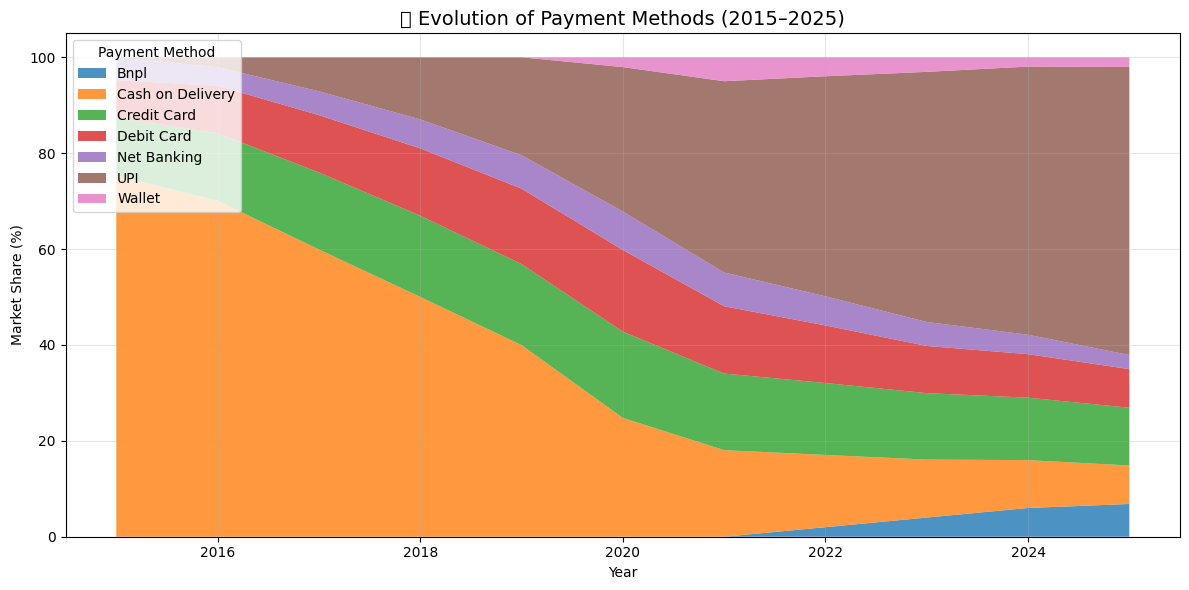

Payment Method Market Share (%):
payment_method  Bnpl  Cash on Delivery  Credit Card  Debit Card  Net Banking  \
Year                                                                           
2015            0.00             75.35        12.04        7.85         4.76   
2016            0.00             70.09        14.09        9.88         3.88   
2017            0.00             59.91        16.07       11.96         4.97   
2018            0.00             50.02        16.94       14.05         6.05   
2019            0.00             39.97        16.90       15.73         6.97   
2020            0.00             24.79        17.99       17.04         8.03   
2021            0.00             18.06        15.98       14.04         7.04   
2022            1.99             15.07        15.00       12.01         6.08   
2023            4.00             12.09        13.86        9.84         5.00   
2024            5.99              9.99        13.02        9.07         4.06   
2025   

In [14]:
# Question 4: Payment Methods Evolution (2015–2025)

import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Filter for 2015–2025
df = df[df['order_date'].dt.year.between(2015, 2025)]

# Create Year column
df['Year'] = df['order_date'].dt.year

# Group by Year & Payment Method (assuming column is 'payment_method')
payment_trends = df.groupby(['Year', 'payment_method']).size().reset_index(name='Count')

# Pivot for stacked area chart
payment_pivot = payment_trends.pivot(index='Year', columns='payment_method', values='Count').fillna(0)

# Convert to percentage share
payment_share = payment_pivot.div(payment_pivot.sum(axis=1), axis=0) * 100

# Plot stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(payment_share.index, payment_share.T, labels=payment_share.columns, alpha=0.8)

# Labels and formatting
plt.title("📊 Evolution of Payment Methods (2015–2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Market Share (%)")
plt.legend(title="Payment Method", loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()

# Print summary table
print("Payment Method Market Share (%):")
print(payment_share.round(2))


C:\Users\SURYA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


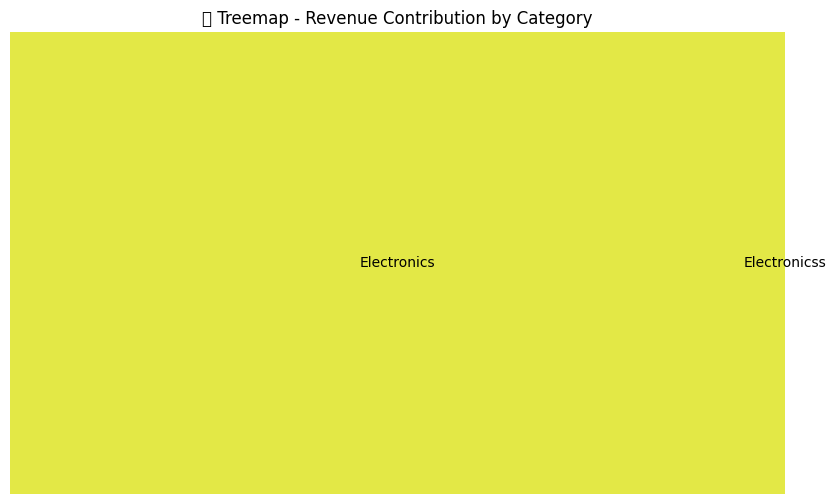

C:\Users\SURYA\AppData\Local\Temp\ipykernel_11608\323094489.py:59: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SURYA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


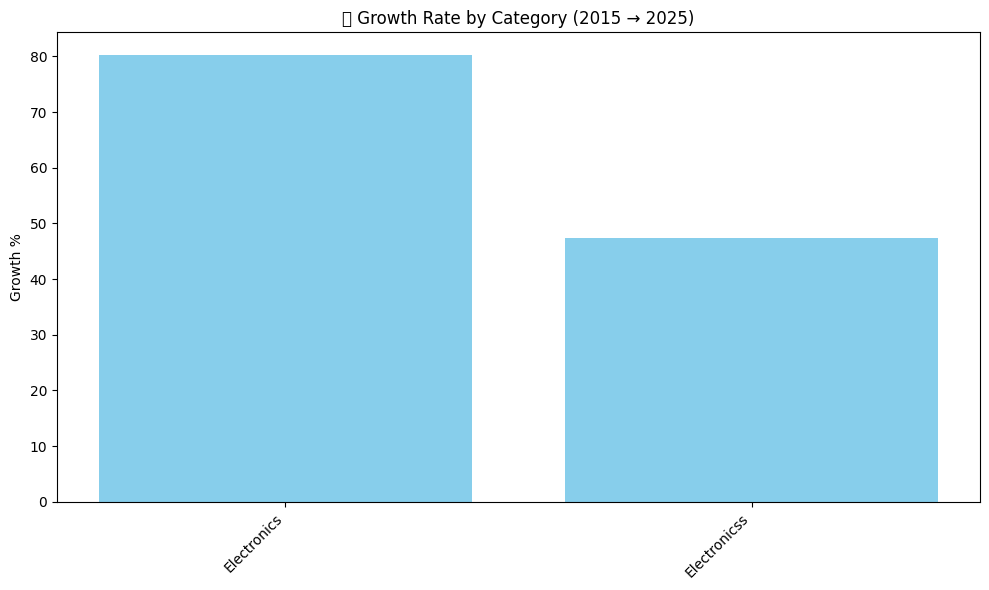

C:\Users\SURYA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


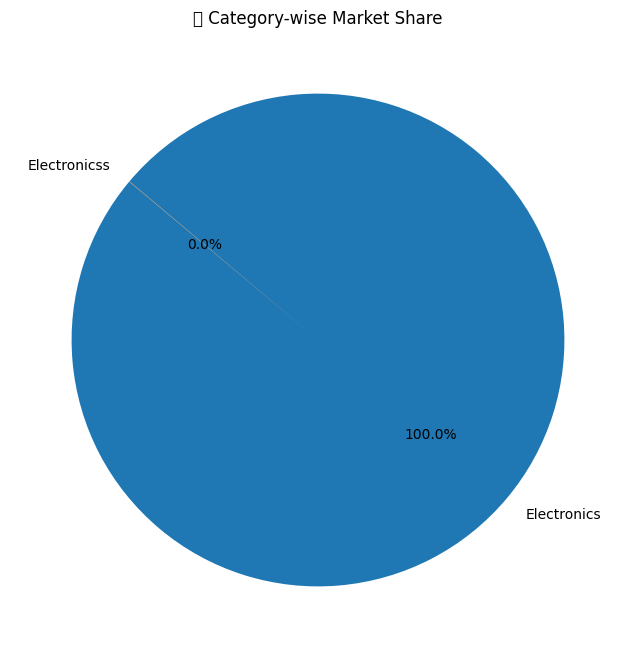

Category-wise Performance (Revenue + Growth %):
       category  final_amount_inr  Growth_%
0   Electronics      7.296370e+10     80.29
1  Electronicss      1.357048e+07     47.36


In [19]:
# Question 5: Category-wise Performance Analysis

import pandas as pd
import matplotlib.pyplot as plt
import squarify   # for treemap (pip install squarify)

# Load cleaned data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Filter for years 2015–2025
df = df[df['order_date'].dt.year.between(2015, 2025)]
df['Year'] = df['order_date'].dt.year

# -------------------------------
# 1. Total Revenue by Category
# -------------------------------
cat_revenue = df.groupby('category')['final_amount_inr'].sum().reset_index()

# -------------------------------
# 2. Growth Rate (2015 → latest year)
# -------------------------------
first_year = df['Year'].min()
latest_year = df['Year'].max()

rev_first = df[df['Year'] == first_year].groupby('category')['final_amount_inr'].sum()
rev_latest = df[df['Year'] == latest_year].groupby('category')['final_amount_inr'].sum()

growth = ((rev_latest - rev_first) / rev_first.replace(0, 1)) * 100
growth = growth.reset_index().rename(columns={'final_amount_inr': 'Growth_%'})

# Merge revenue + growth
cat_analysis = cat_revenue.merge(growth, on='category', how='left').fillna(0)
cat_analysis = cat_analysis.sort_values(by='final_amount_inr', ascending=False)

# -------------------------------
# 3. Treemap: Revenue Contribution
# -------------------------------
plt.figure(figsize=(10,6))
squarify.plot(
    sizes=cat_analysis['final_amount_inr'],
    label=cat_analysis['category'],
    alpha=0.8
)
plt.title("📊 Treemap - Revenue Contribution by Category")
plt.axis('off')
plt.show()

# -------------------------------
# 4. Bar Chart: Growth Rates
# -------------------------------
plt.figure(figsize=(10,6))
plt.bar(cat_analysis['category'], cat_analysis['Growth_%'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title(f"📈 Growth Rate by Category ({first_year} → {latest_year})")
plt.ylabel("Growth %")
plt.tight_layout()
plt.show()

# -------------------------------
# 5. Pie Chart: Market Share
# -------------------------------
plt.figure(figsize=(8,8))
plt.pie(cat_analysis['final_amount_inr'],
        labels=cat_analysis['category'],
        autopct='%1.1f%%',
        startangle=140)
plt.title("🥧 Category-wise Market Share")
plt.show()

# -------------------------------
# 6. Print Summary Table
# -------------------------------
print("Category-wise Performance (Revenue + Growth %):")
print(cat_analysis.round(2))

C:\Users\SURYA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


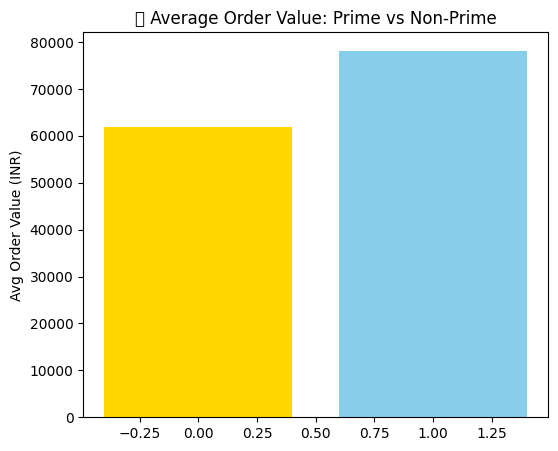

C:\Users\SURYA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


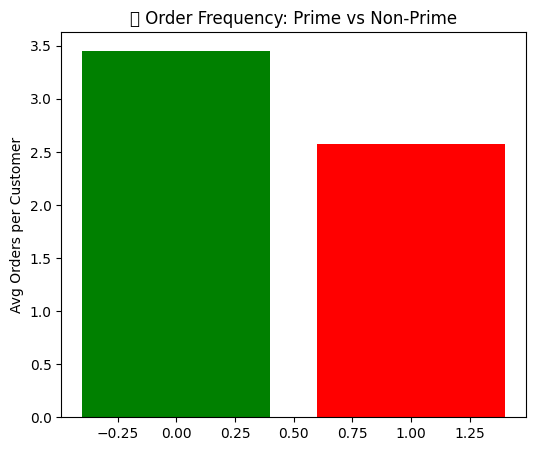

C:\Users\SURYA\AppData\Local\Temp\ipykernel_11608\915397330.py:51: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SURYA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


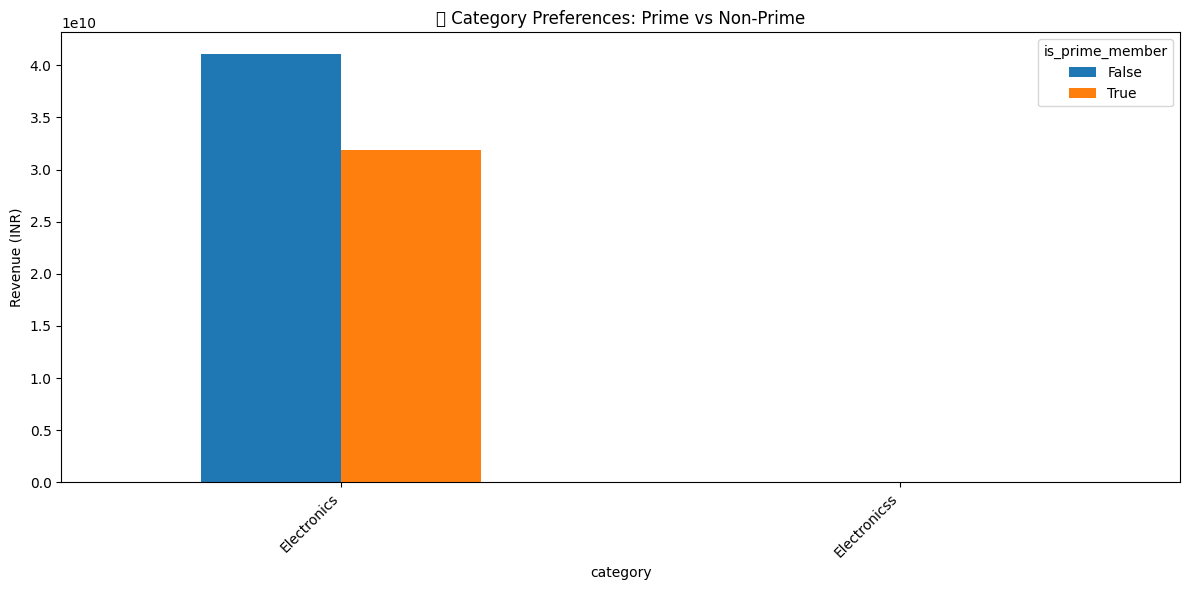

Average Order Value:
   Prime_Status  Avg_Order_Value
0         False         61986.47
1          True         78192.08

Order Frequency per Customer:
   is_prime_member  Order_Count
0            False         3.46
1             True         2.58

Category Preferences (Revenue by Category):
is_prime_member         False         True 
category                                   
Electronics      4.110669e+10  3.185701e+10
Electronicss     9.187107e+06  4.383377e+06


In [20]:
# Question 6: Prime Membership Impact on Customer Behavior

import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Filter valid years
df = df[df['order_date'].dt.year.between(2015, 2025)]

# -------------------------------
# 1. Average Order Value (AOV)
# -------------------------------
aov = df.groupby('is_prime_member')['final_amount_inr'].mean().reset_index()
aov.columns = ['Prime_Status', 'Avg_Order_Value']

plt.figure(figsize=(6,5))
plt.bar(aov['Prime_Status'], aov['Avg_Order_Value'], color=['gold','skyblue'])
plt.title("💰 Average Order Value: Prime vs Non-Prime")
plt.ylabel("Avg Order Value (INR)")
plt.show()

# -------------------------------
# 2. Order Frequency (Orders per Customer)
# -------------------------------
order_freq = df.groupby(['is_prime_member','customer_id']).size().reset_index(name='Order_Count')
order_freq = order_freq.groupby('is_prime_member')['Order_Count'].mean().reset_index()

plt.figure(figsize=(6,5))
plt.bar(order_freq['is_prime_member'], order_freq['Order_Count'], color=['green','red'])
plt.title("📦 Order Frequency: Prime vs Non-Prime")
plt.ylabel("Avg Orders per Customer")
plt.show()

# -------------------------------
# 3. Category Preferences
# -------------------------------
cat_pref = df.groupby(['is_prime_member','category'])['final_amount_inr'].sum().reset_index()

# Pivot for stacked bar chart
cat_pivot = cat_pref.pivot(index='category', columns='is_prime_member', values='final_amount_inr').fillna(0)

cat_pivot.plot(kind='bar', figsize=(12,6))
plt.title("🛒 Category Preferences: Prime vs Non-Prime")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# -------------------------------
# 4. Print Summary Tables
# -------------------------------
print("Average Order Value:")
print(aov.round(2))
print("\nOrder Frequency per Customer:")
print(order_freq.round(2))
print("\nCategory Preferences (Revenue by Category):")
print(cat_pivot.round(2))


In [27]:
import pandas as pd

df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")
print(df.columns)


Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'festival_name', 'customer_rating', 'return_status', 'order_month',
       'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'source_file'],
      dtype='object')


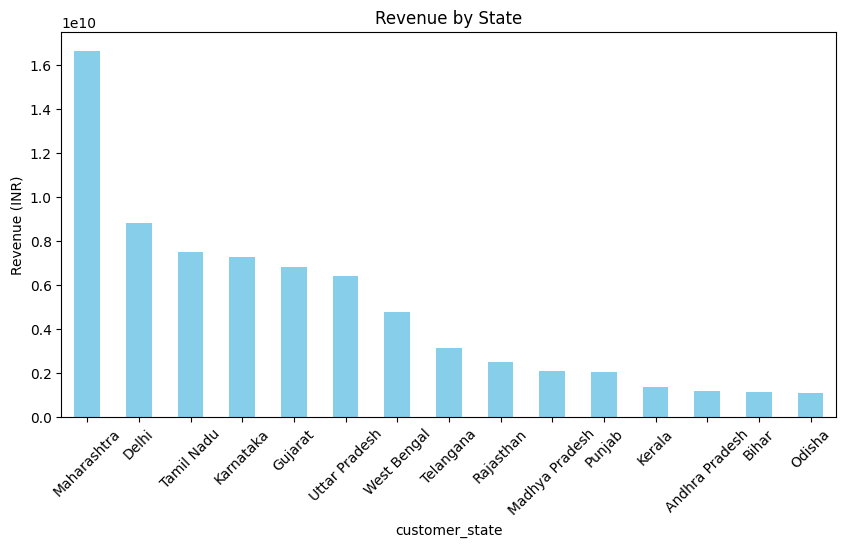

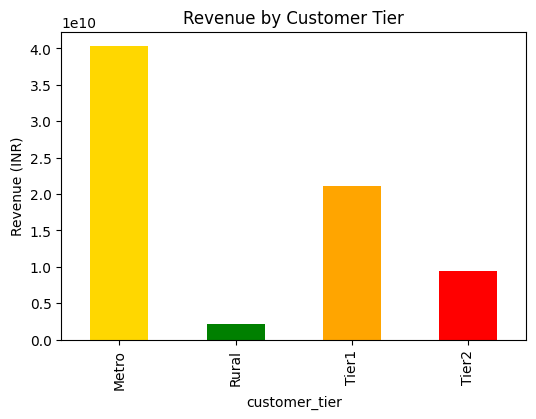

Revenue Growth by Customer Tier (2015 → 2025):
customer_tier
Metro     15.23
Rural    430.05
Tier1    197.49
Tier2    244.36
Name: final_amount_inr, dtype: float64


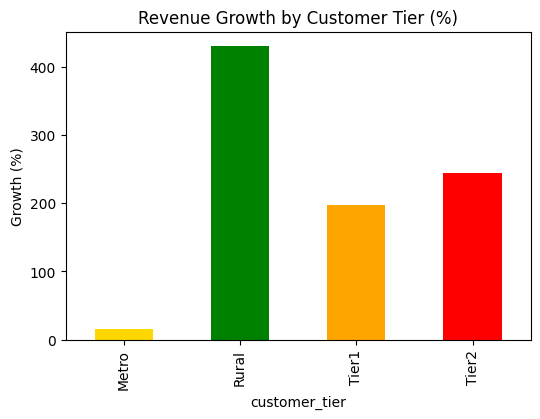

In [28]:
# Question 7: Geographic Sales Performance Analysis
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Load data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")

# 2️⃣ Standardize column names
df.columns = df.columns.str.strip().str.lower()

# 3️⃣ Convert order_date and filter years
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df = df[df['order_date'].dt.year.between(2015, 2025)]
df['year'] = df['order_date'].dt.year

# 4️⃣ Revenue by State
if 'customer_state' in df.columns:
    state_rev = df.groupby('customer_state')['final_amount_inr'].sum().sort_values(ascending=False)
    state_rev.plot(kind='bar', figsize=(10,5), color='skyblue', title="Revenue by State")
    plt.ylabel("Revenue (INR)")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ Column 'customer_state' not found. Skipping state revenue chart.")

# 5️⃣ Revenue by Customer Tier
if 'customer_tier' in df.columns:
    tier_rev = df.groupby('customer_tier')['final_amount_inr'].sum()
    tier_rev.plot(kind='bar', figsize=(6,4), color=['gold','green','orange','red'], title="Revenue by Customer Tier")
    plt.ylabel("Revenue (INR)")
    plt.show()

    # Revenue Growth by Customer Tier (first → last year)
    first_year = df['year'].min()
    last_year = df['year'].max()

    rev_first = df[df['year']==first_year].groupby('customer_tier')['final_amount_inr'].sum()
    rev_last = df[df['year']==last_year].groupby('customer_tier')['final_amount_inr'].sum()

    growth = ((rev_last - rev_first)/rev_first.replace(0,1)) * 100
    print(f"Revenue Growth by Customer Tier ({first_year} → {last_year}):")
    print(growth.round(2))

    growth.plot(kind='bar', figsize=(6,4), color=['gold','green','orange','red'], title="Revenue Growth by Customer Tier (%)")
    plt.ylabel("Growth (%)")
    plt.show()
else:
    print("⚠️ Column 'customer_tier' not found. Skipping tier analysis.")




⚠️ No data for Valentine Day


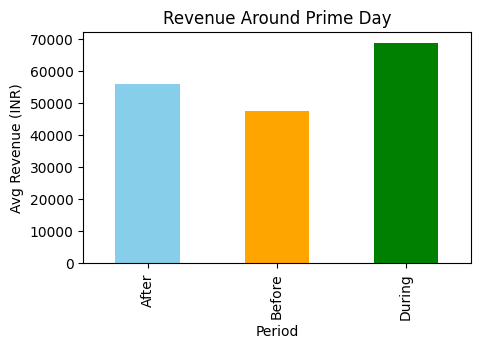

⚠️ No data for Holi


In [3]:
# Question 8: Festival Sales Impact (Basic - 3 Festivals)
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")
df.columns = df.columns.str.strip().str.lower()
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Select 3 key festivals
festivals = ['Valentine Day', 'Prime Day', 'Holi']

for fest in festivals:
    fest_data = df[df['festival_name'] == fest]
    if fest_data.empty:
        print(f"⚠️ No data for {fest}")
        continue

    # Revenue before, during, after (7 days window)
    start = fest_data['order_date'].min() - pd.Timedelta(days=7)
    end = fest_data['order_date'].max() + pd.Timedelta(days=7)
    period_data = df[(df['order_date'] >= start) & (df['order_date'] <= end)].copy()

    def tag_period(date):
        if date < fest_data['order_date'].min():
            return 'Before'
        elif date > fest_data['order_date'].max():
            return 'After'
        else:
            return 'During'

    period_data['Period'] = period_data['order_date'].apply(tag_period)

    avg_rev = period_data.groupby('Period')['final_amount_inr'].mean()

    avg_rev.plot(kind='bar', color=['skyblue','orange','green'], figsize=(5,3), title=f"Revenue Around {fest}")
    plt.ylabel("Avg Revenue (INR)")
    plt.show()


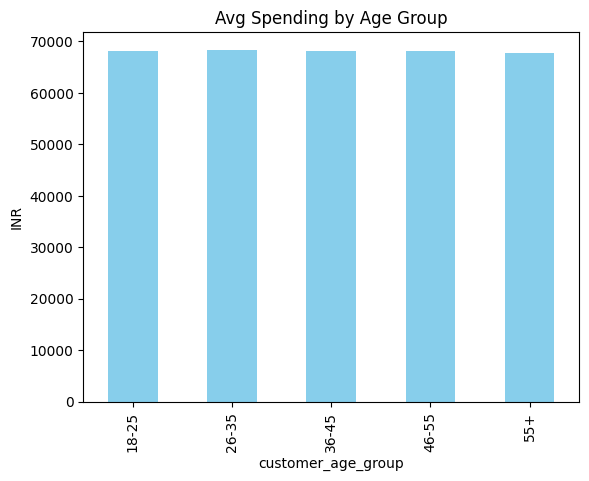

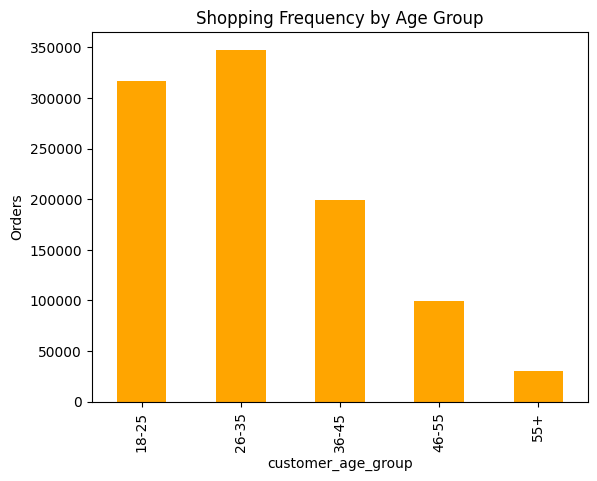

Most popular category for 18-25: Electronics
Most popular category for 26-35: Electronics
Most popular category for 36-45: Electronics
Most popular category for 46-55: Electronics
Most popular category for 55+: Electronics


In [4]:
# Question 9: Customer Age Group Behavior Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")
df.columns = df.columns.str.strip().str.lower()

# Spending pattern (average order value by age group)
df.groupby('customer_age_group')['final_amount_inr'].mean().plot(kind='bar', color='skyblue')
plt.title("Avg Spending by Age Group")
plt.ylabel("INR")
plt.show()

# Shopping frequency (number of orders per age group)
df['customer_age_group'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Shopping Frequency by Age Group")
plt.ylabel("Orders")
plt.show()

# Category preference (most popular category per age group)
top_cats = df.groupby(['customer_age_group','category']).size().reset_index(name='count')
top_cats = top_cats.sort_values(['customer_age_group','count'], ascending=[True,False])

for age in top_cats['customer_age_group'].unique():
    top = top_cats[top_cats['customer_age_group']==age].head(1)
    print(f"Most popular category for {age}: {top.iloc[0]['category']}")


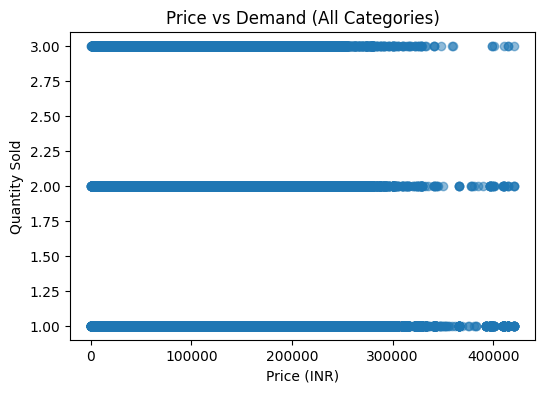

Correlation Matrix:
                       discounted_price_inr  quantity
discounted_price_inr              1.000000  0.000297
quantity                          0.000297  1.000000


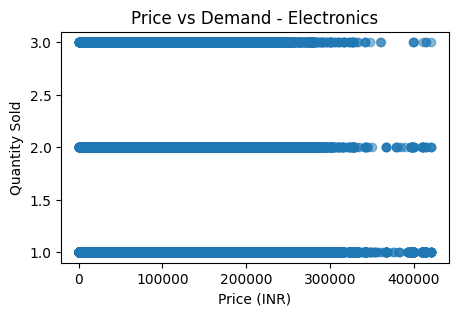

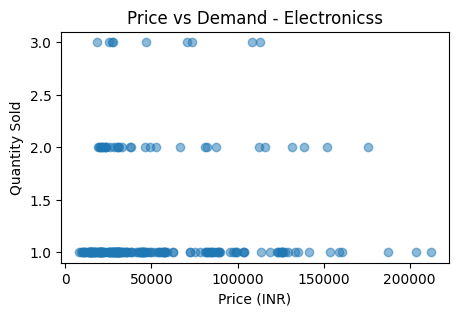

In [5]:
# Question 10: Price vs Demand Analysis (Basic)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")
df.columns = df.columns.str.strip().str.lower()

# Keep only needed columns
data = df[['discounted_price_inr','quantity','category']].dropna()

# 1️⃣ Scatter plot: Price vs Demand
plt.figure(figsize=(6,4))
plt.scatter(data['discounted_price_inr'], data['quantity'], alpha=0.5)
plt.title("Price vs Demand (All Categories)")
plt.xlabel("Price (INR)")
plt.ylabel("Quantity Sold")
plt.show()

# 2️⃣ Correlation matrix
corr = data[['discounted_price_inr','quantity']].corr()
print("Correlation Matrix:\n", corr)

# 3️⃣ Category-wise scatter (small multiples)
for cat in data['category'].unique():
    cat_data = data[data['category']==cat]
    plt.figure(figsize=(5,3))
    plt.scatter(cat_data['discounted_price_inr'], cat_data['quantity'], alpha=0.5)
    plt.title(f"Price vs Demand - {cat}")
    plt.xlabel("Price (INR)")
    plt.ylabel("Quantity Sold")
    plt.show()


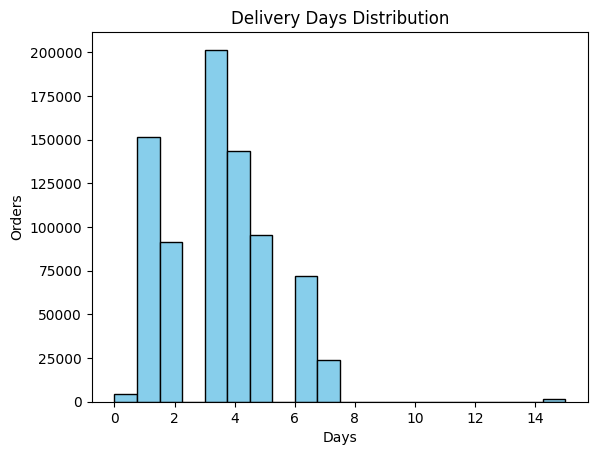

✅ On-time Delivery Rate: 87.65%


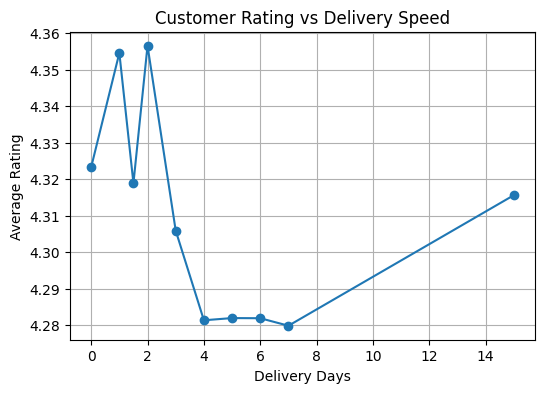

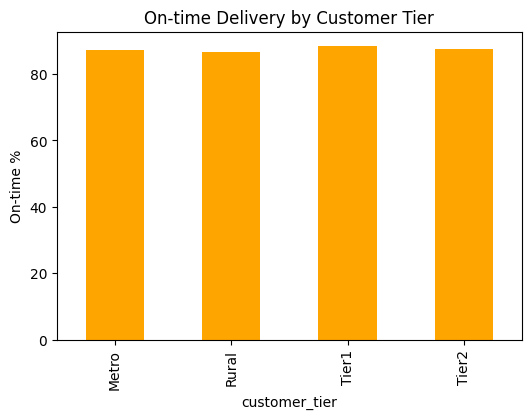

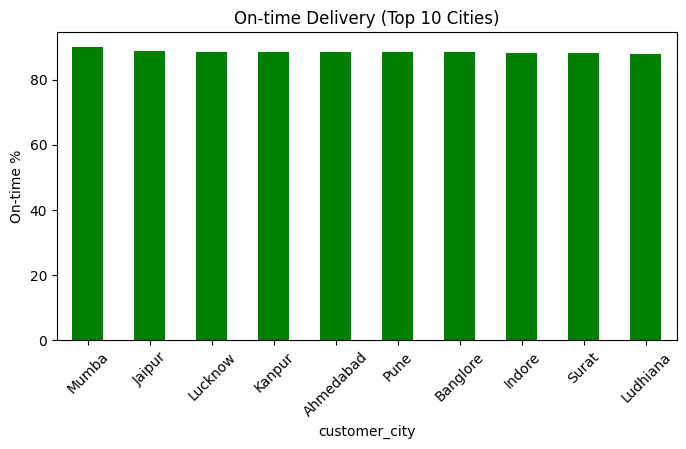

In [6]:
# Question 11: Delivery Performance Analysis (Basic)
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")
df.columns = df.columns.str.strip().str.lower()

# Keep only needed columns
data = df[['delivery_days','customer_city','customer_tier','customer_rating']].dropna()

# 1️⃣ Delivery days distribution
data['delivery_days'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title("Delivery Days Distribution")
plt.xlabel("Days")
plt.ylabel("Orders")
plt.show()

# 2️⃣ On-time performance (<= 5 days = On-time)
data['on_time'] = data['delivery_days'] <= 5
on_time_rate = data['on_time'].mean() * 100
print(f"✅ On-time Delivery Rate: {on_time_rate:.2f}%")

# 3️⃣ Customer satisfaction vs delivery speed
avg_rating = data.groupby('delivery_days')['customer_rating'].mean()
avg_rating.plot(kind='line', marker='o', figsize=(6,4), title="Customer Rating vs Delivery Speed")
plt.xlabel("Delivery Days")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

# 4️⃣ Tier-wise on-time performance
tier_perf = data.groupby('customer_tier')['on_time'].mean() * 100
tier_perf.plot(kind='bar', color='orange', figsize=(6,4), title="On-time Delivery by Customer Tier")
plt.ylabel("On-time %")
plt.show()

# 5️⃣ City-wise (Top 10 cities)
city_perf = data.groupby('customer_city')['on_time'].mean().sort_values(ascending=False).head(10) * 100
city_perf.plot(kind='bar', figsize=(8,4), color='green', title="On-time Delivery (Top 10 Cities)")
plt.ylabel("On-time %")
plt.xticks(rotation=45)
plt.show()


🔄 Overall Return Rate: 7.02%


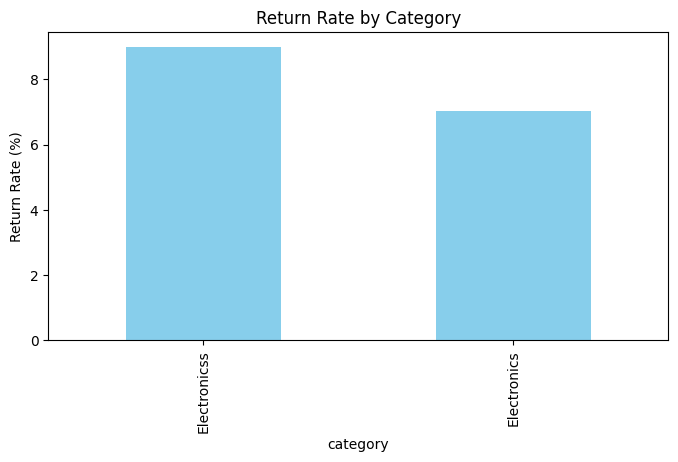

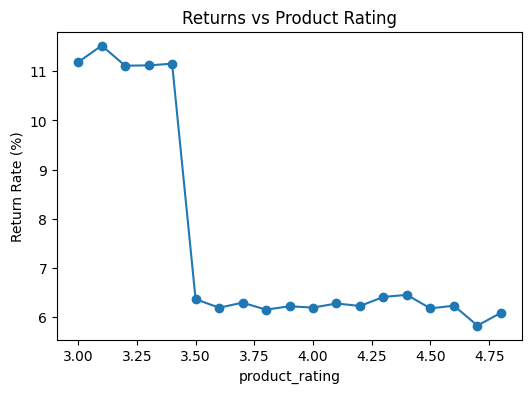

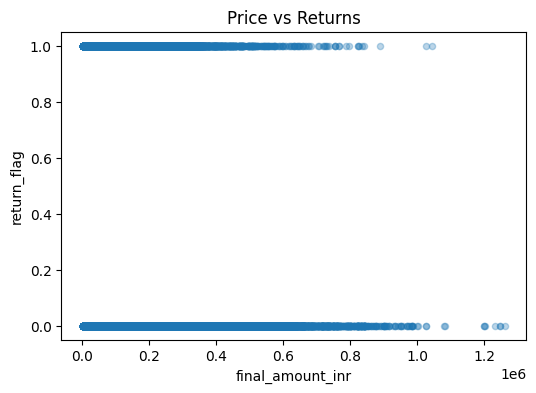

In [2]:
# Question 12: Return Patterns & Customer Satisfaction (Simple)
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Load data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")
df.columns = df.columns.str.strip().str.lower()

# 2️⃣ Handle return_status (convert to 1/0)
df['return_flag'] = df['return_status'].astype(str).str.lower().map(
    lambda x: 1 if "yes" in x or "return" in x else 0
)

# 3️⃣ Overall return rate
return_rate = df['return_flag'].mean() * 100
print(f"🔄 Overall Return Rate: {return_rate:.2f}%")

# 4️⃣ Return rate by category
cat_returns = df.groupby('category')['return_flag'].mean().sort_values(ascending=False) * 100
cat_returns.plot(kind='bar', figsize=(8,4), color='skyblue', title="Return Rate by Category")
plt.ylabel("Return Rate (%)")
plt.show()

# 5️⃣ Relationship: product rating vs return %
rating_returns = df.groupby('product_rating')['return_flag'].mean() * 100
rating_returns.plot(kind='line', marker='o', figsize=(6,4), title="Returns vs Product Rating")
plt.ylabel("Return Rate (%)")
plt.show()

# 6️⃣ Relationship: price vs return %
df[['final_amount_inr','return_flag']].plot(
    kind='scatter', x='final_amount_inr', y='return_flag',
    alpha=0.3, figsize=(6,4), title="Price vs Returns"
)
plt.show()


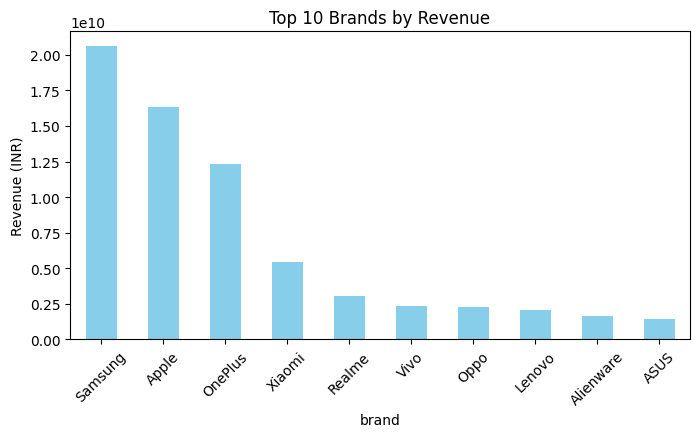

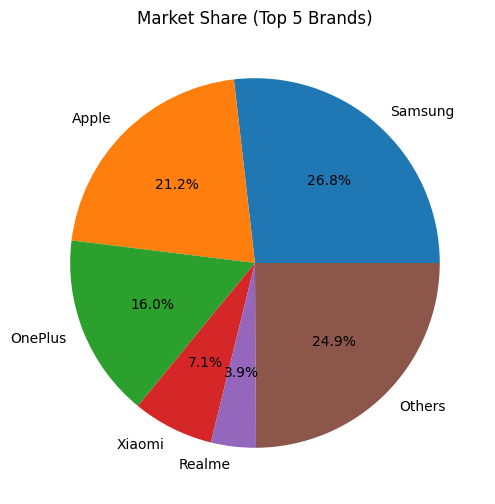

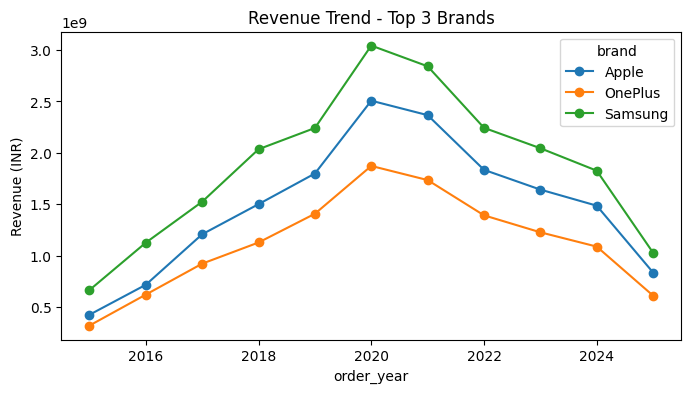

In [5]:
# Question 13: Brand Performance & Market Share (Very Simple)
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")
df.columns = df.columns.str.lower()

# 2. Top 10 brands by revenue
brand_rev = df.groupby('brand')['final_amount_inr'].sum().sort_values(ascending=False)
top10 = brand_rev.head(10)

top10.plot(kind='bar', figsize=(8,4), color='skyblue')
plt.title("Top 10 Brands by Revenue")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=45)
plt.show()

# 3. Market share (Top 5 brands vs Others)
top5 = brand_rev.head(5)
others = brand_rev.sum() - top5.sum()
market_share = pd.concat([top5, pd.Series({'Others': others})])

market_share.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Market Share (Top 5 Brands)")
plt.ylabel("")
plt.show()

# 4. Revenue trend for Top 3 brands
top3 = top5.head(3).index
trend = df[df['brand'].isin(top3)].groupby(['order_year','brand'])['final_amount_inr'].sum().unstack()

trend.plot(kind='line', marker='o', figsize=(8,4))
plt.title("Revenue Trend - Top 3 Brands")
plt.ylabel("Revenue (INR)")
plt.show()


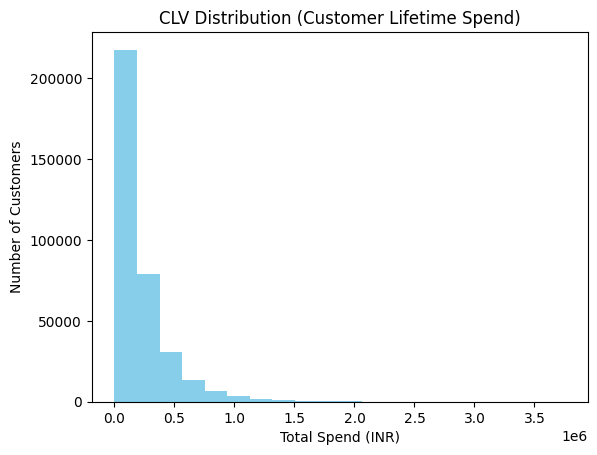

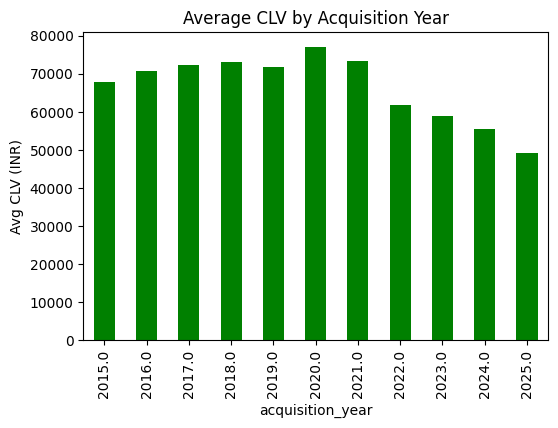

In [6]:
# Question 14: Customer Lifetime Value (CLV) Analysis (Very Simple)
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")
df.columns = df.columns.str.lower()
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# 2. CLV = total spend per customer
clv = df.groupby('customer_id')['final_amount_inr'].sum()

plt.hist(clv, bins=20, color='skyblue')
plt.title("CLV Distribution (Customer Lifetime Spend)")
plt.xlabel("Total Spend (INR)")
plt.ylabel("Number of Customers")
plt.show()

# 3. Average CLV by acquisition year (first purchase year)
acquisition_year = df.groupby('customer_id')['order_date'].min().dt.year
df['acquisition_year'] = df['customer_id'].map(acquisition_year)

clv_by_year = df.groupby('acquisition_year')['final_amount_inr'].mean()

clv_by_year.plot(kind='bar', color='green', figsize=(6,4))
plt.title("Average CLV by Acquisition Year")
plt.ylabel("Avg CLV (INR)")
plt.show()


📊 Correlation Matrix:
                   discount_percent  quantity  final_amount_inr
discount_percent          1.000000 -0.000667         -0.246641
quantity                 -0.000667  1.000000          0.425092
final_amount_inr         -0.246641  0.425092          1.000000


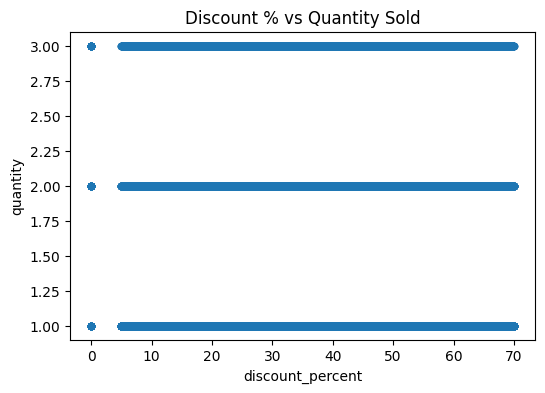

C:\Users\SURYA\AppData\Local\Temp\ipykernel_3712\2957163718.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rev_by_discount = df.groupby('discount_level')['final_amount_inr'].mean()


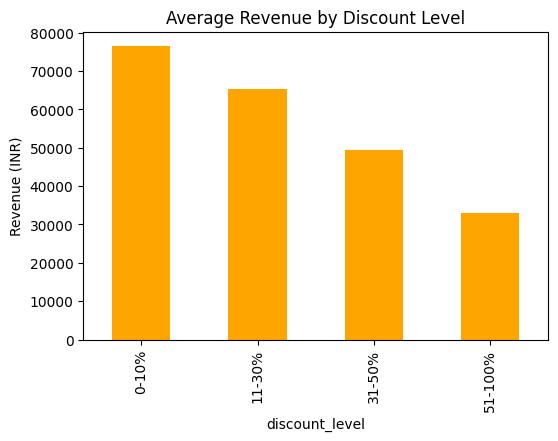

In [7]:
# Question 15: Discount & Promotion Effectiveness (Simple)
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")
df.columns = df.columns.str.lower()

# 2. Correlation between discount % and sales volume
corr = df[['discount_percent', 'quantity', 'final_amount_inr']].corr()
print("📊 Correlation Matrix:\n", corr)

# 3. Scatter plot: Discount % vs Quantity
df.plot(kind='scatter', x='discount_percent', y='quantity', alpha=0.3, figsize=(6,4))
plt.title("Discount % vs Quantity Sold")
plt.show()

# 4. Average revenue by discount level
df['discount_level'] = pd.cut(df['discount_percent'], bins=[0,10,30,50,100],
                              labels=['0-10%','11-30%','31-50%','51-100%'])

rev_by_discount = df.groupby('discount_level')['final_amount_inr'].mean()

rev_by_discount.plot(kind='bar', color='orange', figsize=(6,4))
plt.title("Average Revenue by Discount Level")
plt.ylabel("Revenue (INR)")
plt.show()


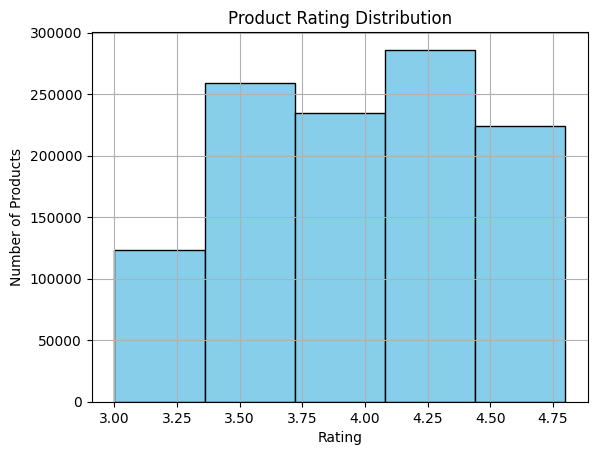

📊 Correlation Matrix:
                   product_rating  quantity  final_amount_inr
product_rating          1.000000  0.000781          0.028193
quantity                0.000781  1.000000          0.425092
final_amount_inr        0.028193  0.425092          1.000000


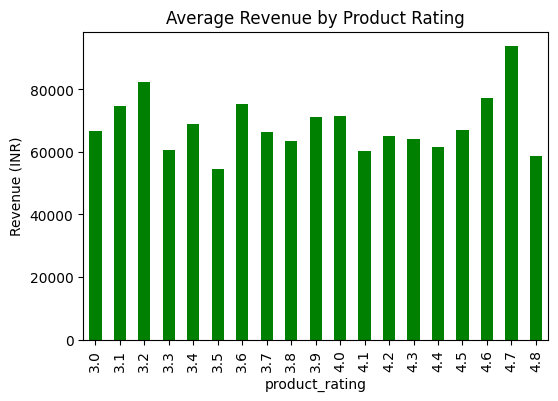

In [8]:
# Question 16: Product Rating Patterns & Impact on Sales (Simple)
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")
df.columns = df.columns.str.lower()

# 2. Rating distribution
df['product_rating'].hist(bins=5, color='skyblue', edgecolor='black')
plt.title("Product Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.show()

# 3. Correlation of rating with sales
corr = df[['product_rating', 'quantity', 'final_amount_inr']].corr()
print("📊 Correlation Matrix:\n", corr)

# 4. Average revenue by rating
avg_rev = df.groupby('product_rating')['final_amount_inr'].mean()

avg_rev.plot(kind='bar', color='green', figsize=(6,4))
plt.title("Average Revenue by Product Rating")
plt.ylabel("Revenue (INR)")
plt.show()


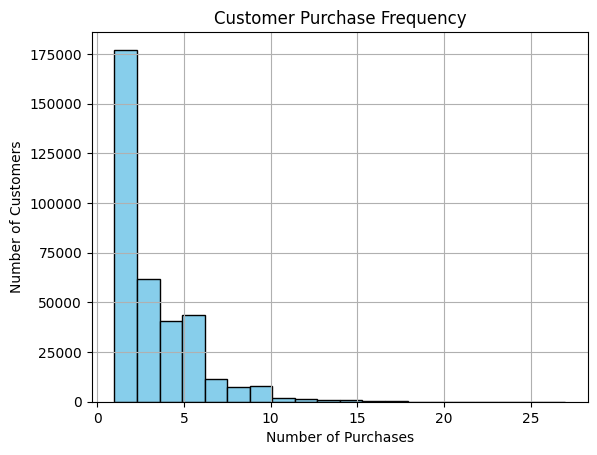

📊 Category Transition Matrix:
next_category  Electronics  Electronicss
category                                
Electronics         772353           143
Electronicss           143             1


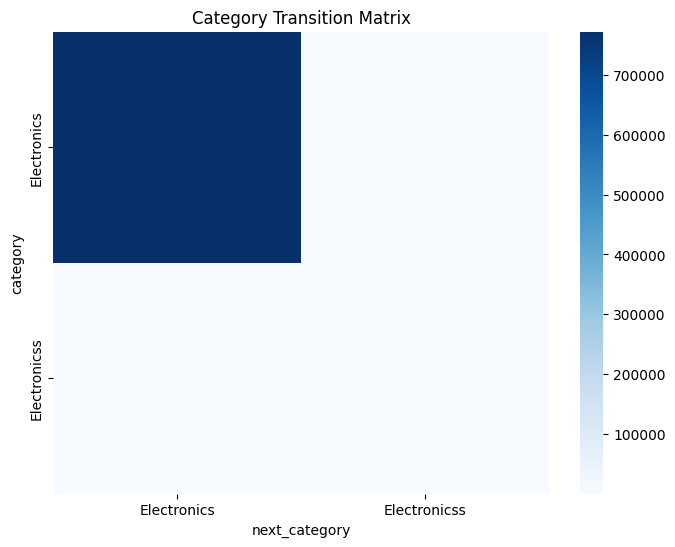

In [9]:
# Question 17: Customer Journey Analysis (Simple)
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")
df.columns = df.columns.str.lower()
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# 2. Purchase frequency per customer
purchase_freq = df.groupby('customer_id')['transaction_id'].count()

purchase_freq.hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()

# 3. Category transitions (first -> next purchase)
df = df.sort_values(['customer_id','order_date'])
df['next_category'] = df.groupby('customer_id')['category'].shift(-1)

transitions = df.groupby(['category','next_category']).size().unstack(fill_value=0)

print("📊 Category Transition Matrix:")
print(transitions.head())

# 4. Simple heatmap of transitions
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(transitions, cmap="Blues", annot=False)
plt.title("Category Transition Matrix")
plt.show()


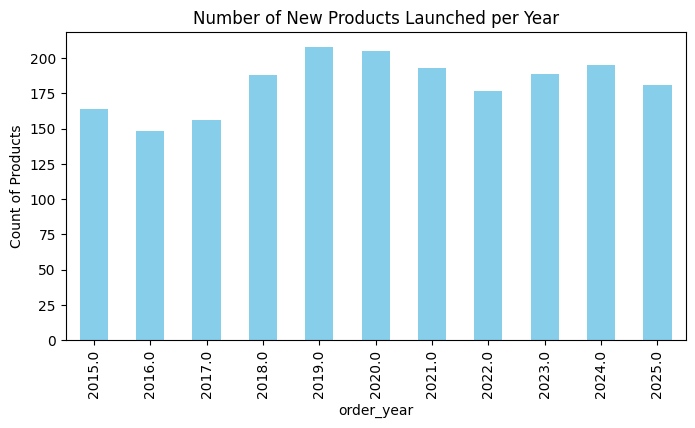

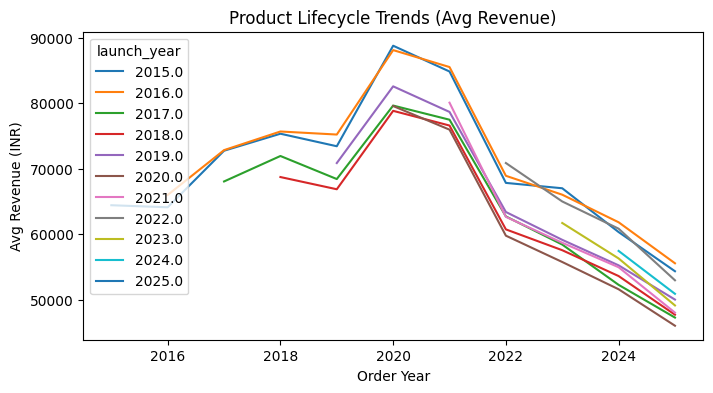

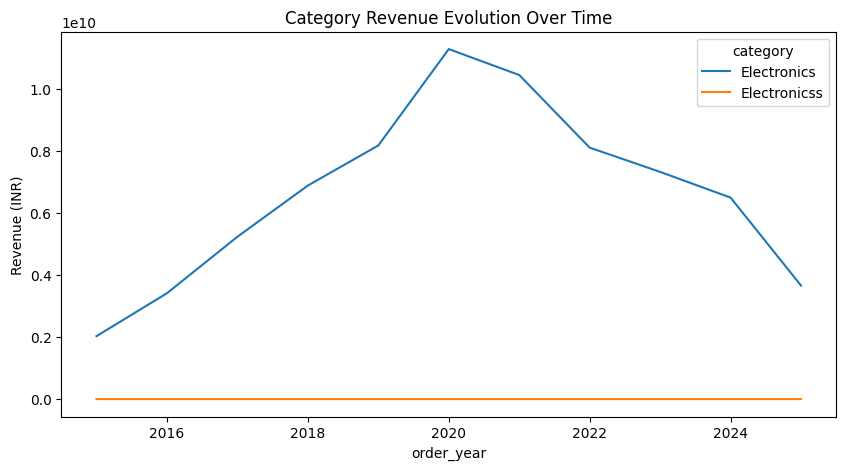

In [10]:
# Question 18: Inventory & Product Lifecycle Patterns (Simple)
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")
df.columns = df.columns.str.lower()
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['order_year'] = df['order_date'].dt.year

# 2. Product launch year (first time product sold)
product_launch = df.groupby('product_id')['order_year'].min()
df['launch_year'] = df['product_id'].map(product_launch)

# Count new products launched per year
launch_trend = product_launch.value_counts().sort_index()
launch_trend.plot(kind='bar', figsize=(8,4), color='skyblue')
plt.title("Number of New Products Launched per Year")
plt.ylabel("Count of Products")
plt.show()

# 3. Product lifecycle (average revenue trend for products by launch year)
lifecycle = df.groupby(['launch_year','order_year'])['final_amount_inr'].mean().unstack()
lifecycle.T.plot(figsize=(8,4))
plt.title("Product Lifecycle Trends (Avg Revenue)")
plt.xlabel("Order Year")
plt.ylabel("Avg Revenue (INR)")
plt.show()

# 4. Category evolution (revenue over years by category)
cat_trend = df.groupby(['order_year','category'])['final_amount_inr'].sum().unstack().fillna(0)
cat_trend.plot(figsize=(10,5))
plt.title("Category Revenue Evolution Over Time")
plt.ylabel("Revenue (INR)")
plt.show()


<Figure size 1000x500 with 0 Axes>

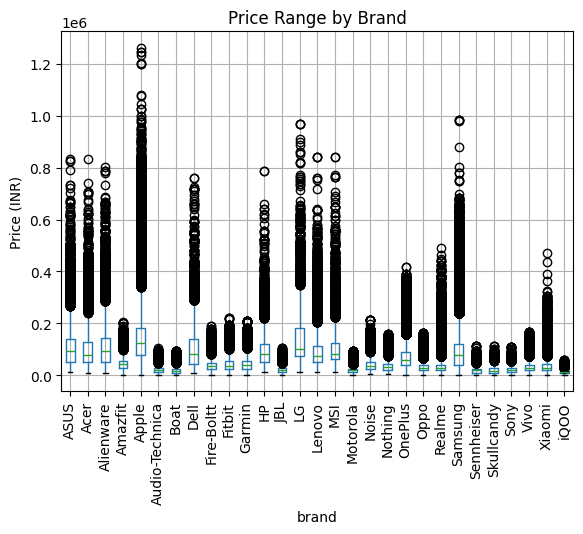

C:\Users\SURYA\AppData\Local\Temp\ipykernel_3712\273818355.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(brand_stats['avg_price'][i], brand_stats['total_sales'][i], brand, fontsize=8)


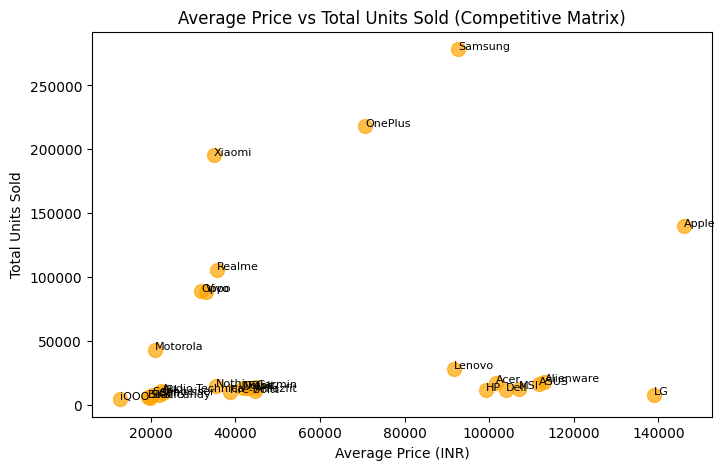

In [12]:
# Question 19: Competitive Pricing Analysis (Very Simple)
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")
df.columns = df.columns.str.lower()

# 2. Keep required columns
data = df[['brand', 'category', 'final_amount_inr', 'quantity']].dropna()

# 3. Boxplot of prices by brand
plt.figure(figsize=(10,5))
data.boxplot(column='final_amount_inr', by='brand', rot=90)
plt.title("Price Range by Brand")
plt.suptitle("")  # remove automatic title
plt.ylabel("Price (INR)")
plt.show()

# 4. Competitive matrix: average price vs total units sold per brand
brand_stats = data.groupby('brand').agg(
    avg_price=('final_amount_inr','mean'),
    total_sales=('quantity','sum')
)

plt.figure(figsize=(8,5))
plt.scatter(brand_stats['avg_price'], brand_stats['total_sales'], s=100, alpha=0.7, color="orange")
for i, brand in enumerate(brand_stats.index):
    plt.text(brand_stats['avg_price'][i], brand_stats['total_sales'][i], brand, fontsize=8)

plt.title("Average Price vs Total Units Sold (Competitive Matrix)")
plt.xlabel("Average Price (INR)")
plt.ylabel("Total Units Sold")
plt.show()


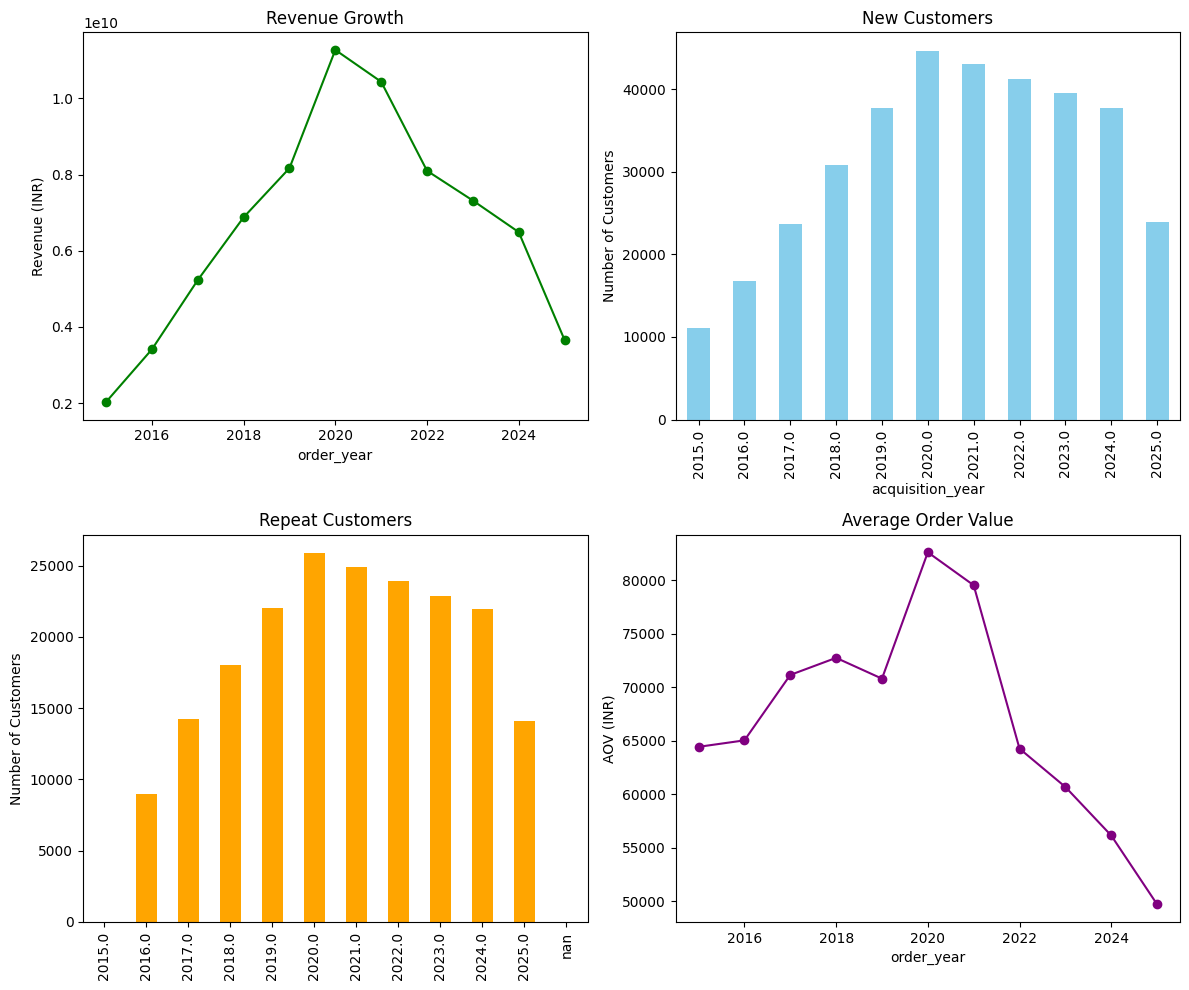

In [13]:
# Question 20: Business Health Dashboard
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")
df.columns = df.columns.str.lower()
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['order_year'] = df['order_date'].dt.year

# 2. Revenue growth
revenue = df.groupby('order_year')['final_amount_inr'].sum()

# 3. New customers per year
first_purchase = df.groupby('customer_id')['order_date'].min().dt.year
df['acquisition_year'] = df['customer_id'].map(first_purchase)
new_customers = df.groupby('acquisition_year')['customer_id'].nunique()

# 4. Repeat customers per year
repeat_customers = df.groupby('order_year')['customer_id'].nunique() - new_customers.reindex(df['order_year'].unique(), fill_value=0)

# 5. Average order value
aov = df.groupby('order_year')['final_amount_inr'].mean()

# 6. Plot simple dashboard
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
revenue.plot(marker='o', color='green', title="Revenue Growth")
plt.ylabel("Revenue (INR)")

plt.subplot(2,2,2)
new_customers.plot(kind='bar', color='skyblue', title="New Customers")
plt.ylabel("Number of Customers")

plt.subplot(2,2,3)
repeat_customers.plot(kind='bar', color='orange', title="Repeat Customers")
plt.ylabel("Number of Customers")

plt.subplot(2,2,4)
aov.plot(marker='o', color='purple', title="Average Order Value")
plt.ylabel("AOV (INR)")

plt.tight_layout()
plt.show()


In [2]:
def load_data():
    df = pd.read_csv(r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv")
    df.columns = df.columns.str.strip().str.lower()
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
    df = df[df['order_date'].dt.year.between(2015, 2025)]
    return df


In [4]:
import pandas as pd
import datetime as dt
import os

# -----------------------------
# 1. Load Data
# -----------------------------
file_path = r"C:\code\Amazon_India_Analytics\data\cleaned\amazon_sales_cleaned.csv"
df = pd.read_csv(file_path, parse_dates=['order_date'])

# Clean columns
df.columns = df.columns.str.strip().str.lower()

# Ensure valid order_date
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df = df[df['order_date'].notna()]

# Create order_year and order_month
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month

# -----------------------------
# 2. Create Outputs Folder
# -----------------------------
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)

# -----------------------------
# 3. Yearly Revenue
# -----------------------------
yearly_revenue = (
    df.groupby('order_year')['final_amount_inr']
    .sum()
    .reset_index()
    .rename(columns={'final_amount_inr': 'total_revenue_inr'})
)
yearly_revenue.to_csv(os.path.join(output_dir, "yearly_revenue.csv"), index=False)

# -----------------------------
# 4. Category Performance
# -----------------------------
cat_analysis = (
    df.groupby('category')['final_amount_inr']
    .sum()
    .reset_index()
    .sort_values(by="final_amount_inr", ascending=False)
    .rename(columns={'final_amount_inr': 'total_revenue_inr'})
)
cat_analysis.to_csv(os.path.join(output_dir, "category_performance.csv"), index=False)

# -----------------------------
# 5. RFM Segmentation
# -----------------------------
snapshot_date = df['order_date'].max() + dt.timedelta(days=1)
rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (snapshot_date - x.max()).days,
    'customer_id': 'count',
    'final_amount_inr': 'sum'
}).rename(columns={
    'order_date': 'Recency',
    'customer_id': 'Frequency',
    'final_amount_inr': 'Monetary'
}).reset_index()
rfm.to_csv(os.path.join(output_dir, "rfm_segmentation.csv"), index=False)

# -----------------------------
# 6. Customer Growth
# -----------------------------
customer_growth = (
    df.groupby('order_year')['customer_id']
    .nunique()
    .reset_index()
    .rename(columns={'customer_id': 'unique_customers'})
)
customer_growth.to_csv(os.path.join(output_dir, "customer_growth.csv"), index=False)

# -----------------------------
# 7. Average Order Value (AOV)
# -----------------------------
aov = (
    df.groupby('order_year')['final_amount_inr']
    .mean()
    .reset_index()
    .rename(columns={'final_amount_inr': 'avg_order_value_inr'})
)
aov.to_csv(os.path.join(output_dir, "average_order_value.csv"), index=False)

# -----------------------------
# 8. Confirmation
# -----------------------------
print("✅ All analytics tables exported successfully to 'outputs/' folder.")


✅ All analytics tables exported successfully to 'outputs/' folder.
